In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [1]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

Downloaded utils.py


In [7]:
# from utils import set_pyplot_params
# set_pyplot_params()

이전 장에서는 베이즈 정리를 사용하여 쿠키 문제를 해결하고, 그런 다음 베이즈 테이블을 사용하여 다시 해결했습니다. 이번 장에서는 "확률 질량 함수"를 나타내는 Pmf 객체를 사용하여 한 번 더 문제를 해결할 것입니다. 이것이 무엇을 의미하며, 왜 베이지안 통계에 유용한지 설명하겠습니다.
PMF = Probability Mass Fucntion 

우리는 Pmf 객체를 사용하여 좀 더 어려운 문제를 해결하고 베이지안 통계로 한 단계 더 나아갈 것입니다. 그러나 우리는 분포부터 시작하겠습니다.

## 분포(Distrubution)
통계학에서 **분포(Distribution)**는 가능한 결과(outcome)들과 그에 해당하는 확률들의 집합입니다. 예를 들어, 동전을 던질 경우, 거의 동등한 확률로 두 가지 가능한 결과가 있습니다. 여섯 면 주사위를 굴릴 경우, 가능한 결과 집합은 1부터 6까지의 숫자이며, 각 결과와 관련된 확률은 1/6입니다.

분포를 나타내기 위해 empiricaldist라는 라이브러리를 사용할 것입니다. "경험적" 분포는 이론적인 분포 대신 데이터에 기반한 분포를 의미합니다. 이 라이브러리는 이 책 전체에서 사용될 것이며, 이 장에서 기본 기능을 소개하고 나중에 추가 기능을 살펴볼 것입니다.

## Probability Mass Functions
만약 분포의 결과가 이산적인 경우, 확률 질량 함수(Probability Mass Function, PMF)를 사용하여 분포를 설명할 수 있습니다. PMF는 각 가능한 결과에서 해당하는 확률로 매핑하는 함수입니다.

empiricaldist는 확률 질량 함수를 나타내는 Pmf 클래스를 제공합니다. Pmf를 사용하려면 다음과 같이 가져와서 사용할 수 있습니다:

In [2]:
!pip install empiricaldist

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12122 sha256=c633859452d9d8ea766377d15a84ff123b14bcdc48e9513f5765f2e8d24e71e0
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\9e\6c\a4\6d002e4f35dbe60786322ff8e3032ddab20898164bd3d1c37f
Successfully built empiricaldist


In [3]:
from empiricaldist import Pmf

다음 예제는 동전 던지기의 결과를 나타내는 Pmf를 생성합니다. 코드는 다음과 같습니다:

In [4]:
coin=Pmf()
coin['heads']=1/2
coin['tails']=1/2
coin

,probs
heads,0.5
tails,0.5


`Pmf`는 아무 결과도 가지지 않은 빈 `Pmf`를 생성하며, 이후에 대괄호 연산자를 사용하여 새로운 결과를 추가할 수 있습니다. 이 예제에서는 두 가지 결과가 문자열로 표시되며, 두 결과 모두 0.5의 확률을 가집니다.

`Pmf`를 가능한 결과의 시퀀스에서 만들 수도 있습니다.

다음 예제에서는 `Pmf.from_seq`를 사용하여 6면 주사위를 나타내는 Pmf를 만듭니다. 코드는 다음과 같습니다:

In [7]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [8]:
sum(die)

0.9999999999999999

이 예제에서는 시퀀스 내의 모든 결과가 한 번씩 나타나므로 모든 결과는 동일한 확률인 $1/6$을 가집니다.

보다 일반적으로, 결과는 다음 예제와 같이 한 번 이상 나타날 수 있습니다:

In [10]:
letters = Pmf.from_seq(list('Mississippi')) # 빈도(frequensist)
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [13]:
list_str=list('Mississippi')
list_str

['M', 'i', 's', 's', 'i', 's', 's', 'i', 'p', 'p', 'i']

In [14]:
len(list_str)

11

In [31]:
str_dict={}
for i in list_str:
    if i not in str_dict.keys(): 
        str_dict[i]=0
        str_dict[i]+=1
    else:
        str_dict[i]+=1
        
for i,v in str_dict.items():
    str_dict[i]=v/len(list_str)       
    
str_dict

{'M': 0.09090909090909091,
 'i': 0.36363636363636365,
 's': 0.36363636363636365,
 'p': 0.18181818181818182}

In [32]:
sum(str_dict.values())

1.0

In [37]:
from collections import Counter

list_str = list("Mississippi")  # 입력 문자열을 여기에 넣으세요.
str_dict = Counter(list_str)

total_chars = len(list_str)
for char, count in str_dict.items():
    str_dict[char] = count / total_chars
str_dict

Counter({'i': 0.36363636363636365,
         's': 0.36363636363636365,
         'p': 0.18181818181818182,
         'M': 0.09090909090909091})

In [38]:
def pmf1(x):
    str_dict={}
    for i in x:
        if i not in str_dict.keys(): 
            str_dict[i]=0
            str_dict[i]+=1
        else:
            str_dict[i]+=1
    for i,v in str_dict.items():
        str_dict[i]=v/len(x)   
    return str_dict

In [39]:
import pandas as pd

In [40]:
pmf1(list_str)

{'M': 0.09090909090909091,
 'i': 0.36363636363636365,
 's': 0.36363636363636365,
 'p': 0.18181818181818182}

In [41]:
pd.Series(pmf1(list_str))

M    0.090909
i    0.363636
s    0.363636
p    0.181818
dtype: float64

문자 `M`은 11자 중 한 번 나타나므로 확률은 $1/11$입니다.
문자 'i'가 4번 나타나므로 확률은 $4/11$입니다.

문자열의 문자는 무작위 프로세스의 결과가 아니므로 `Pmf`의 문자에 대해 보다 일반적인 용어인 "수량"을 사용하겠습니다.

`Pmf` 클래스는 Pandas `Series`에서 상속되므로 `Series`로 수행할 수 있는 모든 작업은 `Pmf`로도 수행할 수 있습니다.

예를 들어 대괄호 연산자를 사용하여 수량을 조회하고 해당 확률을 얻을 수 있습니다.

In [43]:
try:
    letters['t']
except KeyError as e:
    print(type(e))

<class 'KeyError'>


"Mississippi"라는 단어에서는 글자의 약 36%가 "s"입니다.

그러나 분포에 없는 수량의 확률을 묻는 경우 'KeyError'가 발생합니다.

In [45]:
letters('s')

0.36363636363636365

수량이 분포에 포함되어 있으면 결과는 동일합니다.
하지만 분포에 없으면 결과는 오류가 아닌 '0'입니다.

In [46]:
letters('t')

0

괄호를 사용하면 연속된 갯수를 제공하고 연속된 확률을 얻을 수도 있습니다.

In [50]:
die([1,2,4,7,6,11])

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.        ,
       0.        ])

In [51]:
die2 = Pmf.from_seq([7,9,11,12,13])

In [52]:
die2([1,2,4,7,6,11])

array([0. , 0. , 0. , 0.2, 0. , 0.2])

In [53]:
import random

In [67]:
list_rand = []
for _ in range(0,100):
    list_rand.append(random.randint(0,100))
# list_rand
# pmf1(list_rand)
# cnt = Counter(list_rand)
# cnt

In [66]:
list1=random.choices(range(0,100),k=100)
# pmf1(list1)

$$ P(3 \lt X \lt 4)=> F_{X}(4) - F_{X}(3) $$

In [68]:
import numpy as np
random_data = [np.random.randint(1,11) for i in range(100)]
die3 = Pmf.from_seq(random_data)
cdf= 0 #  누적(cumulative) 분포(distribution) 함수(function)
for i in die3:
    cdf+=i
    print(i)
cdf

0.14
0.13
0.06
0.11
0.08
0.06
0.17
0.09
0.09
0.07


1.0

## 쿠키 문제 재검토

이 섹션에서는 `Pmf`를 사용하여 <<_TheCookieProblem>>의 쿠키 문제를 해결하겠습니다.
문제의 진술은 다음과 같습니다.

> 쿠키 두 그릇이 있다고 가정해 보세요.
>
> * 그릇 1에는 바닐라 쿠키 30개, 초코 쿠키 10개가 들어있습니다.
>
> * 그릇 2에는 바닐라 쿠키 20개, 초코 쿠키 20개가 들어있습니다.
>
> 이제 그릇 중 하나를 무작위로 선택하고 보지 않고 무작위로 쿠키를 선택한다고 가정해 보겠습니다. 쿠키가 바닐라라면 그릇 1에서 나왔을 확률은 얼마입니까?

다음은 두 가지 가설과 사전 확률을 나타내는 `Pmf`입니다.

In [69]:
prior = Pmf.from_seq(['Bowl 1','Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


각 가설에 대한 사전 확률을 포함하는 이 분포를 **사전(prior) 분포**라고 합니다.

새로운 데이터(바닐라 쿠키)를 기반으로 분포를 업데이트하려면,
사전에 가능성(likelihood)을 곱합니다. 가능성
그릇 1에서 바닐라 쿠키를 선택하는 가능성은 '3/4'입니다. 가능성
Bowl 2의 likelihood '1/2'입니다.

In [70]:
likelihood_vanilla=[0.75,0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


데이터의 likelihood는 각 그릇에 담긴 바닐라 쿠키의 비율이며, `hypos`를 사용하여 계산할 수 있습니다.

결과는 정규화되지 않은 후방입니다. 즉, 합이 1이 되지 않습니다.
이를 1이 되도록 하려면 `Pmf`에서 제공하는 방법인 `normalize`를 사용하면 됩니다.

In [71]:
posterior.normalize()

0.625

'normalize'의 반환 값은 데이터의 총 확률이며 $5/8$입니다.

각 가설에 대한 사후 확률을 포함하는 'posterior'를  **사후 분포**라고 합니다.

In [72]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


사후 분포에서 Bowl 1에 대한 사후 확률을 선택할 수 있습니다.

In [73]:
posterior('Bowl 1')

0.6

그리고 답은 0.6입니다.

`Pmf`개체를 사용하면 더 많은 데이터로 연속적인 업데이트를 쉽게 수행할 수 있다는 이점이 있습니다.
예를 들어, 첫 번째 쿠키를 다시 넣고(그릇의 내용물이 변하지 않도록) 동일한 그릇에서 다시 선택합니다.
두 번째 쿠키도 바닐라인 경우 다음과 같이 두 번째 업데이트를 수행할 수 있습니다.

$$ P(\theta | X) = \frac{P(X|\theta)P(\theta)}{P(X)} $$

In [74]:
posterior*=likelihood_vanilla # 사후 확률은 이전의 사후확률이 다시 사전확률이 되어 
#likelihood와 곱한다. 갱신
posterior.normalize() #정규화
posterior #더한 결과 1

,probs
Bowl 1,0.692308
Bowl 2,0.307692


이제 그릇 1의 사후 확률은 거의 70%입니다.
하지만 같은 일을 다시 해서 초콜릿 쿠키를 얻었다고 가정해 보세요.

새 데이터의 가능성은 다음과 같습니다.

In [76]:
likelihood_chocolate=[0.25,0.5]

In [77]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


이제 그릇 1의 사후 확률은 약 53%입니다.
바닐라 쿠키 2개와 초콜릿 1개 이후의 사후 확률은 50/50에 가깝습니다.

## 101그릇

다음으로 101개의 그릇으로 쿠키 문제를 해결해 보겠습니다.

* 그릇 0에는 바닐라 쿠키 0%가 들어 있으며,

* 그릇 1에는 바닐라 쿠키 1%가 들어있고,

* 그릇 2에는 바닐라 쿠키 2%가 들어있고,

등등, 최대

* 그릇 99에는 바닐라 쿠키가 99% 함유되어 있으며,

* 100그릇에는 바닐라 쿠키가 모두 들어있습니다.

이전 버전과 마찬가지로 쿠키는 바닐라와 초콜렛 두 종류만 존재합니다. 따라서 그릇 0은 모두 초콜릿 쿠키이고 그릇 1은 99% 초콜릿입니다.

그릇을 무작위로 선택하고, 쿠키도 무작위로 선택했는데, 결과적으로 바닐라가 나왔다고 가정해 보겠습니다. $x$의 각 값에 대해 쿠키가 Bowl $x$에서 나올 확률은 얼마입니까?

이 문제를 해결하기 위해 'np.arange'를 사용하여 0부터 100까지 번호가 매겨진 101개의 가설을 나타내는 배열을 만듭니다.

In [78]:
import numpy as np

In [82]:
hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

사전 확률을 생성하기 위해 배열 사용

In [85]:
prior = Pmf(1,hypos)
prior.normalize()
# prior

101

이 예에서 볼 수 있듯이 두 개의 매개변수를 사용하여 `Pmf`를 초기화할 수 있습니다.
첫 번째 매개변수는 사전 확률입니다. 두 번째 매개변수는 일련의 수량입니다.

이 예에서는 확률이 모두 동일하므로 그 중 하나만 제공하면 됩니다. 그것은 가설 전반에 걸쳐 "broadcast(차원을 맞추기위해 복제)"됩니다.
모든 가설은 동일한 사전 확률을 가지므로 이 분포는 **균일**합니다.

처음 몇 가지 가설과 확률은 다음과 같습니다.

In [88]:
x_broadcast=np.arange(1,101).reshape(50,2)
x_broadcast.shape

(50, 2)

In [91]:
y_broadcast=np.arange(1,51)
y_broadcast.shape
z_=y_broadcast.reshape(50,1)

In [95]:
np.rad2deg(np.pi)

180.0

In [96]:
np.degrees(np.pi)

180.0

In [100]:
d90 = np.deg2rad(90)

In [101]:
np.cos(d90)

6.123233995736766e-17

In [103]:
rotate_matrix_90d=np.array([[np.cos(d90),-np.sin(d90)],[np.sin(d90),np.cos(d90)]])
rotate_matrix_90d

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [105]:
np.dot(rotate_matrix_90d,np.array([4,3]))

array([-3.,  4.])

$$ 회전 행렬 = \begin{pmatrix}
 cos\theta&-sin\theta  \\
 sin\theta&cos\theta 
\end{pmatrix} $$

In [137]:
x_ = np.array([[1,2]]).T
x_.shape

(2, 1)

In [155]:
a_matrix=np.array([[1,2,3],
                   [1,2,5]]) 
print(a_matrix.shape)
b_vecotr = np.array([1,2,3])
# print(b_vecotr.shape)
b_vecotr_2 = np.array([[1,2,3]])
print(b_vecotr_2.shape)
np.dot(a_matrix,b_vecotr)

(2, 3)
(1, 3)


array([14, 20])

In [159]:
a = np.array([[1,2,3],[1,2,3]])
b2 = np.array([[10,20,30]])
a*b2  #broadcasting 발생하여 자동으로 계산 , 아다마르곱 됨

array([[10, 40, 90],
       [10, 40, 90]])

In [135]:
vector_org1 = np.array([4, 3]).reshape(2,1)
rotate_mat(vector_org1)

array([[-3.],
       [ 4.]])

In [115]:
def rotate_mat(x):
    rotate_matrix_90d=np.array([[np.cos(d90),-np.sin(d90)],[np.sin(d90),np.cos(d90)]])
    return np.dot(rotate_matrix_90d,x)

In [133]:
vector_org = np.array([4, 3])
sum1=0
for i in vector_org:
    sum1+=i*i
np.sqrt(sum1)

5.0

In [122]:
vector_org = [4, 3]
rotate_vector=rotate_mat(vector_org)


array([-12.,  12.])

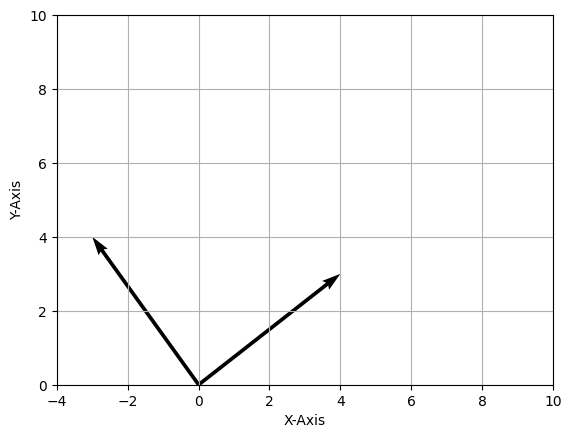

In [129]:
import matplotlib.pyplot as plt

# 2차원 벡터를 정의합니다.
vector_org = [4, 3]

# 원점에서 벡터의 끝점까지 화살표를 그립니다.
plt.quiver(0, 0, vector_org[0], vector_org[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, rotate_vector[0], rotate_vector[1], angles='xy', scale_units='xy', scale=1)

# x, y 축 범위를 설정합니다.
plt.xlim(-4, 10)
plt.ylim(0, 10)

# x, y 축 레이블을 설정합니다.
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# 그리드를 표시합니다.
plt.grid()

# 그래프를 보여줍니다.
plt.show()

In [94]:
# x_broadcast * z_

In [86]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [224]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

하나의 바닐라 쿠키 후에 사전분포와 사후 분포의 그림그리기

In [228]:
from utils import decorate

In [229]:
def decorate_bowls(title):
    decorate(xlabel='Bowl #',ylabel = 'PMF', title=title)

In [225]:
posterior1 = prior*likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


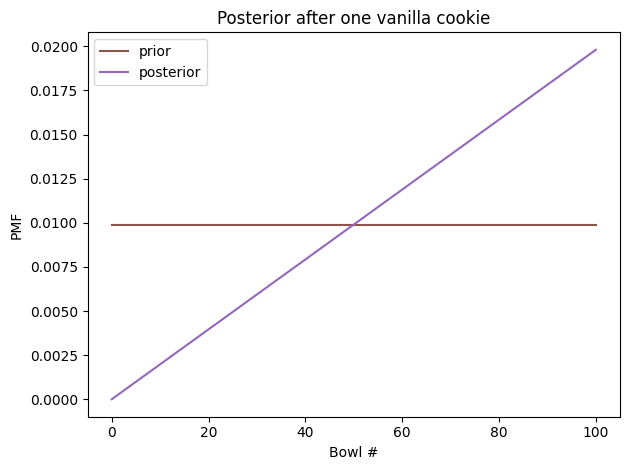

In [230]:
prior.plot(label='prior',color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

In [231]:
posterior2 = posterior1*likelihood_vanilla
posterior2.normalize()
posterior2.head()

,probs
0,0.000000
1,0.000003
2,0.000012


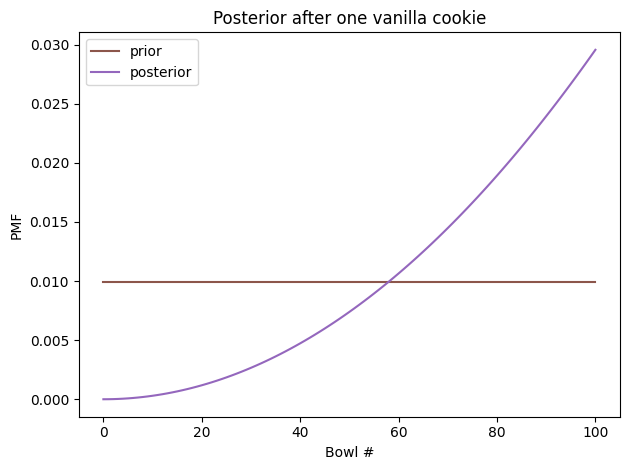

In [232]:
prior.plot(label='prior',color='C5')
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

두 개의 바닐라 쿠키 다음에는 숫자가 높은 그릇에 바닐라 쿠키가 가장 많이 포함되어 있으므로 사후 확률이 가장 높습니다. 낮은 번호의 그릇은 확률이 가장 낮습니다.

하지만 다시 그림을 그려 초콜릿 쿠키를 얻었다고 가정해 보겠습니다.
업데이트는 다음과 같습니다.

In [245]:
likelihood_chocolate= 1-hypos/100
posterior3 = posterior2*likelihood_chocolate
posterior3.normalize()

0.2462686567164179

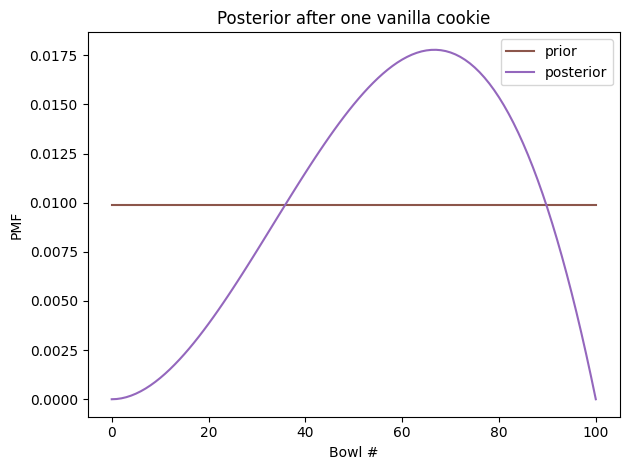

In [252]:
prior.plot(label='prior',color='C5')
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')


이제 Bowl 100에는 초콜릿 쿠키가 포함되어 있지 않기 때문에 제거되었습니다.
그러나 숫자가 높은 그릇이 낮은 그릇보다 더 가능성이 높습니다. 왜냐하면 우리가 초콜릿보다 바닐라 쿠키를 더 많이 봤기 때문입니다.

실제로 사후 분포의 정점은 Bowl 67에 있으며, 이는 우리가 관찰한 데이터에서 바닐라 쿠키의 비율인 $2/3$에 해당합니다.

사후 확률이 가장 높은 수량을 **MAP**이라고 하며 이는 "최대 사후 확률"을 의미합니다. 여기서 "사후"는 "사후"를 뜻하는 불필요한 라틴어입니다.

MAP을 계산하려면 `Series` 메서드 `idxmax`를 사용할 수 있습니다.

최대 우도 추정(MLE / Maximum Likelihood Estimation)에서는 데이터 세트를 생성할 확률을 최대화하는 분포를 추정하는 것을 의미합니다. 이 글에서는 이를 데이터로부터의 분포(distribution) 추론(inference)을 위한 일반적인 프레임워크로 정의하고 이를 여러 종류의 데이터 분포에 적용할 것입니다. 이 방법은 실험 데이터에 대해 신경망을 훈련할 때 사용할 최적의 손실 함수를 결정하는 데 사용할 수 있습니다.

<img src='./images/4.jpg'>

$$ \hat{\theta} = \underset{{ \overrightarrow{ \theta} } } {argmax} \prod_{i=1}^{N}p(x_{i}| \overrightarrow{\theta}) $$

In [253]:
posterior3.idxmax() # posterior가 가장 큰 index

67

In [243]:
A=[[1,2],
   [1,3],
   [2,5]]
B=[[1,2,1,7],
   [1,4,-1,5]]
C=[[0,0,0,0]]*3
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
#             print(A[i][k],'x',B[k][j],'=',A[i][k]*B[k][j])
#             print('행렬',i,j)
            C[i][j]+=A[i][k]*B[k][j]
#         print('C' , C[i][j])
#     print('================')
C

C 3
C 10
C -1
C 17
C 7
C 24
C -3
C 39
C 14
C 48
C -6
C 78


[[14, 48, -6, 78], [14, 48, -6, 78], [14, 48, -6, 78]]

In [244]:
A = [[1, 2], [1, 3], [2, 5]]
B = [[1, 2, 1, 7], [1, 4, -1, 5]]
C = [[0, 0, 0, 0] for _ in range(len(A))]  # 각 행을 별도의 리스트로 초기화

for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]

C

[[3, 10, -1, 17], [4, 14, -2, 22], [7, 24, -3, 39]]

In [216]:
A=[[1,2],
   [1,3],
   [2,5]]
B=[[1,2,1,7],
   [1,4,-1,5]]
transposed_B=list(zip(*B))

outer_list=[]
for i in A:
    inner_list=[]
    for j in transposed_B:
        sum1=0
        for i_1,j_1 in zip(i,j):
            sum1+=i_1*j_1
        inner_list.append(sum1)
    outer_list.append(inner_list)
outer_list

[[3, 10, -1, 17], [4, 14, -2, 22], [7, 24, -3, 39]]